In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\cosmicray_filter.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


'0.0.51'

In [2]:
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

In [3]:
filetype='headless_txt' # Specifies raman file format, here a text file with no header
file_ext='.txt' # File extension, a txt file
prefix=False # File doesn't have a 01, 02 prefix, as WItec can add
exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Spectrum'] # Exclude files with these strings in
Diad_Files=pf.get_files(path=spectra_path, file_ext=file_ext, 
            exclude_str=exclude_str)
print(Diad_Files)

['Cap19-05X1.txt', 'Cap19-05X2.txt', 'Cap19-06X1.txt', 'Cap19-06X2.txt', 'Cap19-07X1.txt', 'Cap19-07X2.txt', 'Cap19-08X1.txt', 'Cap19-08X2.txt', 'Cap19-12X1.txt', 'Cap19-12X2.txt', 'Cap19-17X1.txt', 'Cap19-17X2.txt', 'Cap19-18X1.txt', 'Cap19-18X2.txt', 'FG04_31_MI.txt', 'FG04_31_MI3 (1).txt', 'FG04_31_MI3.txt', 'FG04_31_MI4 (1).txt', 'FG04_31_MI4.txt', 'POC1.txt', 'POC10.txt', 'POC11.txt', 'POC12.txt', 'POC13.txt', 'POC14.txt', 'POC15.txt', 'POC16.txt', 'POC17.txt', 'POC18.txt', 'POC19.txt', 'POC2.txt', 'POC20.txt', 'POC21.txt', 'POC22.txt', 'POC23.txt', 'POC24.txt', 'POC25.txt', 'POC26.txt', 'POC27.txt', 'POC28.txt', 'POC29.txt', 'POC3.txt', 'POC30.txt', 'POC31.txt', 'POC32.txt', 'POC33.txt', 'POC34.txt', 'POC35.txt', 'POC36.txt', 'POC37.txt', 'POC38.txt', 'POC39.txt', 'POC4.txt', 'POC40.txt', 'POC41.txt', 'POC42.txt', 'POC43.txt', 'POC44.txt', 'POC45.txt', 'POC46.txt', 'POC47.txt', 'POC48.txt', 'POC49.txt', 'POC5.txt', 'POC50 (Sub BG).txt', 'POC50.txt', 'POC51 (Sub BG).txt', 'POC51.t

In [4]:
file_weak=pf.get_data(path=spectra_path,
    filename='Cap19-17X2.txt', filetype=filetype)

In [77]:
file_medium=pf.get_data(path=spectra_path,
    filename='POC35.txt', filetype=filetype)



In [49]:
file_strong=pf.get_data(path=spectra_path,
    filename='POC2.txt', filetype=filetype)

## Figure for DiadFit paper

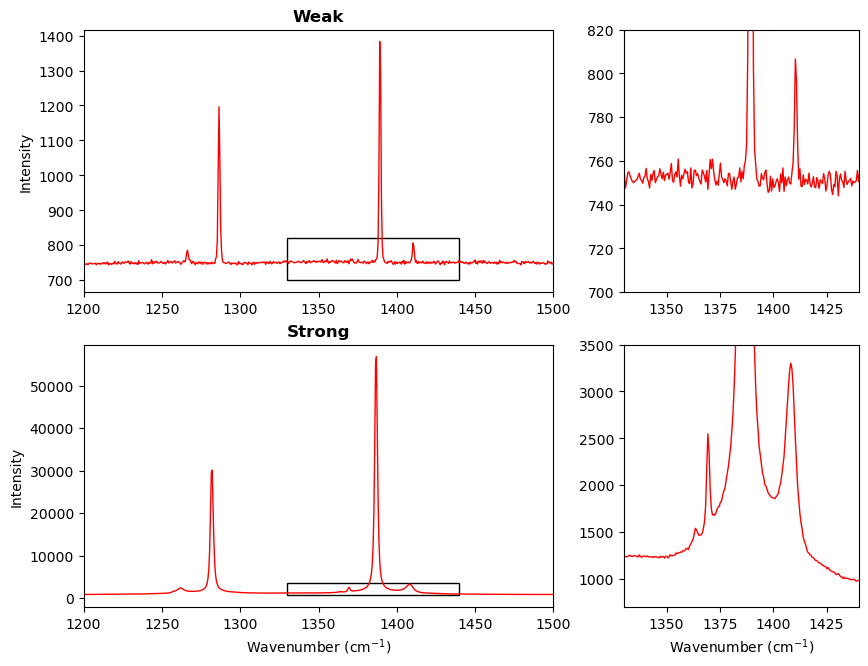

In [90]:
widths = [1, 1/2]
fig, ((ax1, ax1b), (ax3,ax3b) ) = plt.subplots(2, 2, figsize=(10,7.5), gridspec_kw={'width_ratios': widths})
# Weak
ax1.plot(file_weak[:, 0], 
         file_weak[:, 1], '-r', lw=1)
ax1b.plot(file_weak[:, 0], 
         file_weak[:, 1], '-r', lw=1)
# Medium
ax2.plot(file_medium[:, 0], 
         file_medium[:, 1], '-r', lw=1)
ax2b.plot(file_medium[:, 0], 
         file_medium[:, 1], '-r', lw=1)
# Strong
ax3.plot(file_strong[:, 0], 
         file_strong[:, 1], '-r', lw=1)
ax3b.plot(file_strong[:, 0], 
         file_strong[:, 1], '-r', lw=1)
xlim1=1330
xlim2=1440
ax1.set_xlim([1200, 1500])
ax2.set_xlim([1200, 1500])
ax3.set_xlim([1200, 1500])

ax1b.set_xlim([xlim1, xlim2])
ax2b.set_xlim([xlim1, xlim2])
ax3b.set_xlim([xlim1, xlim2])

# Showing the hotband in more detail
import matplotlib.patches as patches
rect_ax1b = patches.Rectangle((xlim1,700),xlim2-xlim1,820-700,linewidth=1,edgecolor='k',facecolor='none', label='test')
ax1.add_patch(rect_ax1b)

rect_ax2b = patches.Rectangle((xlim1,700),xlim2-xlim1,1300-700,linewidth=1,edgecolor='k',facecolor='none', label='test')
ax2.add_patch(rect_ax2b)

rect_ax3b = patches.Rectangle((xlim1,700),xlim2-xlim1,3500-700+100,linewidth=1,edgecolor='k',facecolor='none', label='test')
ax3.add_patch(rect_ax3b)

ax3b.set_ylim([700, 3500])
ax2b.set_ylim([700, 1300])
ax1b.set_ylim([700, 820])
ax1.set_ylabel('Intensity')
ax2.set_ylabel('Intensity')
ax3.set_ylabel('Intensity')
ax3.set_xlabel('Wavenumber (cm$^{-1}$)')
ax3b.set_xlabel('Wavenumber (cm$^{-1}$)')
ax1.set_title('Weak', fontweight='bold')
ax2.set_title('Medium', fontweight='bold')
ax3.set_title('Strong', fontweight='bold')
fig.savefig('Strong-MEdium-Weak.png', dpi=200, transparent=True)

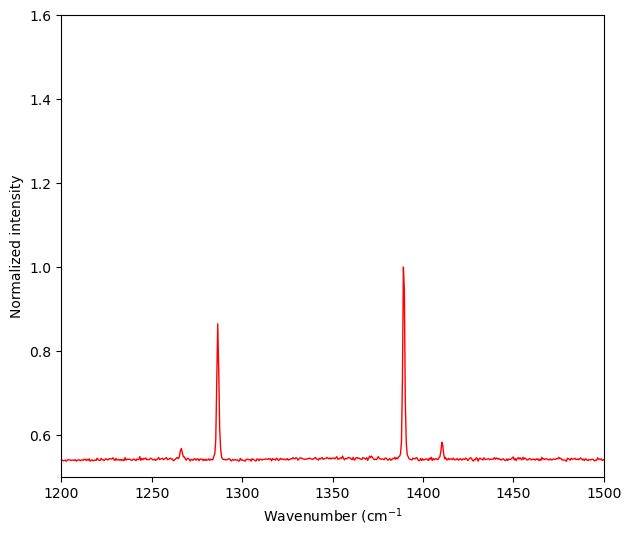

In [6]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7,6))
ax1.plot(file_weak[:, 0], 
         file_weak[:, 1]/(np.max(file_weak[:, 1])), '-r', lw=1)
# ax1.plot(file_strong[:, 0], 
#          file_strong[:, 1]/(np.max(file_strong[:, 1]))+0.5, '-b', lw=1)
ax1.set_xlim([1200, 1500])
ax1.set_ylim([0.5, 1.6])
ax1.set_ylabel('Normalized intensity')
ax1.set_xlabel('Wavenumber (cm$^{-1}$')
fig.savefig('diadoffset1.png', dpi=200)

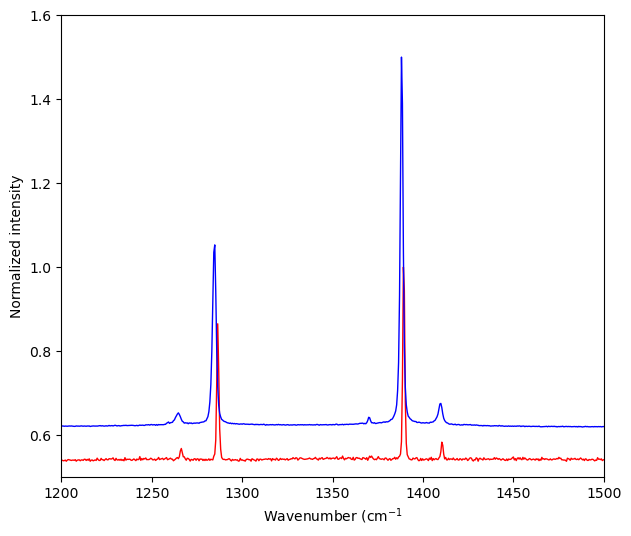

In [30]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7,6))
ax1.plot(file_weak[:, 0], 
         file_weak[:, 1]/(np.max(file_weak[:, 1])), '-r', lw=1)
ax1.plot(file_strong[:, 0], 
         file_strong[:, 1]/(np.max(file_strong[:, 1]))+0.5, '-b', lw=1)
ax1.set_xlim([1200, 1500])
ax1.set_ylim([0.5, 1.6])
ax1.set_ylabel('Normalized intensity')
ax1.set_xlabel('Wavenumber (cm$^{-1}$')
fig.savefig('diadoffset2.png', dpi=200)